In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Load Dataset

In [25]:
vocab_size = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

## Decode reviews to text preprocessing

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_reviews = [" ".join([reverse_word_index.get(i - 3, "?") for i in review]) for review in X_train]

In [27]:
decoded_reviews[0]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Pad Sequences

In [28]:
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (25000, 200)
Testing data shape: (25000, 200)


## Load GloVe Embeddings

In [29]:
import numpy as np

embeddings_index = {}
glove_file_path = 'glove.6B.100d.txt'  # Update with the correct path to your GloVe file

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


## Prepare embedding matrix

In [30]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## Define LSTM model with GloVe embedding

In [31]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128, activation='tanh',return_sequences=False),
    Dense(1, activation='sigmoid')
])

### Compile model

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 117,377
Non-trainable params: 1,000,000
_________________________________________________________________


### Train the model

In [33]:
history = model.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=64, 
    validation_split=0.2
)

Epoch 1/5
313/313 [==============================] - 10s 27ms/step - loss: 0.6913 - accuracy: 0.5156 - val_loss: 0.6875 - val_accuracy: 0.5254
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 0.6799 - accuracy: 0.5411 - val_loss: 0.6751 - val_accuracy: 0.5504
Epoch 3/5
313/313 [==============================] - 8s 26ms/step - loss: 0.6685 - accuracy: 0.5546 - val_loss: 0.6698 - val_accuracy: 0.5562
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 0.6516 - accuracy: 0.5835 - val_loss: 0.6442 - val_accuracy: 0.5922
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 0.6477 - accuracy: 0.5803 - val_loss: 0.6530 - val_accuracy: 0.5774


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model with GloVe Embeddings Test Accuracy: {accuracy}")

782/782 [==============================] - 8s 10ms/step - loss: 0.6598 - accuracy: 0.5635
LSTM Model with GloVe Embeddings Test Accuracy: 0.5635200142860413


## Define LSTM Model Without GloVe

In [35]:
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

### Compile model

In [36]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [37]:
lstm_history = lstm_model.fit(X_train, y_train,
                            epochs=5,
                            batch_size=64,
                            validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 10s 28ms/step - loss: 0.6539 - accuracy: 0.6047 - val_loss: 0.5857 - val_accuracy: 0.7176
Epoch 2/5
313/313 [==============================] - 8s 26ms/step - loss: 0.6011 - accuracy: 0.6806 - val_loss: 0.5906 - val_accuracy: 0.6820
Epoch 3/5
313/313 [==============================] - 9s 27ms/step - loss: 0.5953 - accuracy: 0.6698 - val_loss: 0.5719 - val_accuracy: 0.7134
Epoch 4/5
313/313 [==============================] - 10s 30ms/step - loss: 0.4576 - accuracy: 0.8076 - val_loss: 0.5717 - val_accuracy: 0.7128
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 0.4380 - accuracy: 0.8110 - val_loss: 0.5488 - val_accuracy: 0.7588


In [38]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Model without GloVe Embeddings Test Accuracy: {lstm_accuracy}")

782/782 [==============================] - 8s 10ms/step - loss: 0.5438 - accuracy: 0.7641
LSTM Model without GloVe Embeddings Test Accuracy: 0.7641199827194214


## Plot accuracy Comparison

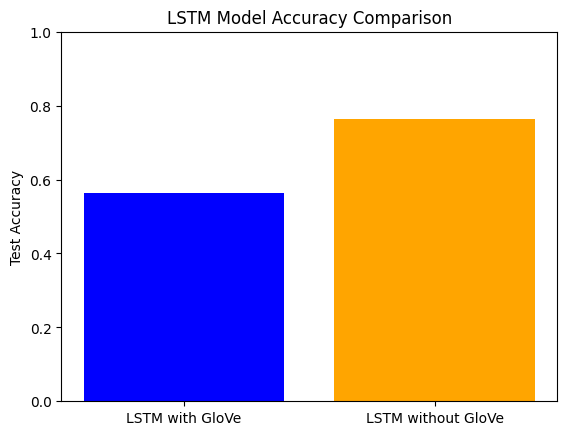

In [39]:
models = ['LSTM with GloVe', 'LSTM without GloVe']
accuracies = [accuracy, lstm_accuracy]
import matplotlib.pyplot as plt
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Test Accuracy')
plt.title('LSTM Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()